# Fixed Point Iteration Method

In [26]:
import math

def g(x):
    # return - x**2 / 2 + x + 1/ 2
    return x**2/3 + x - 1/3
    # return 2.2 * math.cos(x) # |-2.2sin(x)| < 1, then g(x) will converge 

def fixed_point_method(x1, max_iterations, tolerance):
    x_n = x1
    for n in range(1, max_iterations + 1):
        x_n_plus_1 = g(x_n)
        print(f"Iteration {n}: x_{n+1} = {x_n_plus_1:.6f}")
        
        # Check for convergence
        if abs(x_n_plus_1 - x_n) < tolerance:
            print(f"Converged to {x_n_plus_1:.6f} after {n} iterations.")
            return x_n_plus_1
        x_n = x_n_plus_1
    
    print("Maximum iterations reached without convergence.")
    return x_n

x1 = 1.00001
max_iterations = 20
tolerance = 1e-4

fixed_point_method(x1, max_iterations, tolerance)

Iteration 1: x_2 = 1.000017
Converged to 1.000017 after 1 iterations.


1.0000166667000001

# Newton’s_Method

In [17]:
import math

def f(x):
    return 2.2 * math.cos(x) - x
    # return math.sin(x) - 0.5 * x  
    # return math.sqrt(math.cos(x)) - x  
    # return 3 * x / math.tan(x)  
    # return math.tan(x) - 2 * x 
    # return 5 * x**3 + 5 * x**2 + 4
    # return math.exp(x) - 5.5 * x
    # return math.exp(3 * x) + 5 * x - 2
    # return x**3 + x + 2
    # return x**2 - 7 * x + 10  

def f_prime(x):
    return -2.2 * math.sin(x) - 1
    # return math.cos(x) - 0.5  
    # return -0.5 * math.sin(x) / math.sqrt(math.cos(x)) - 1 
    # return (3 * math.tan(x) - 3 * x * (1 / (math.cos(x))**2)) / (math.tan(x))**2  
    # return 1 / math.cos(x)**2 - 2 
    # return 15 * x**2 + 10 * x
    # return math.exp(x) - 5.5
    # return 3 * math.exp(3 * x) + 5
    # return 3 * x**2 + 1
    # return 2 * x - 7  

x0 = 0.00001

def newtons_method(x0, tolerance=1e-6, max_iterations=100):
    x_n = x0
    for n in range(max_iterations):
        f_xn = f(x_n)
        f_prime_xn = f_prime(x_n)
        
        if abs(f_prime_xn) < 1e-10:
            print("Derivative too small. Stopping iteration.")
            return None
        
        x_n1 = x_n - f_xn / f_prime_xn
        
        print(f"Iteration {n+1}: x = {x_n1:.6f}, f(x) = {f(x_n1):.6f}")
        
        # Check if the result is within the tolerance level
        if abs(x_n1 - x_n) < tolerance:
            return x_n1
        
        x_n = x_n1
    
    print("no convergence upon hitting max number of iterations")
    return None

approximate_root = newtons_method(x0)

if approximate_root is not None:
    print(f"\nroot is approximately x = {approximate_root:.6f}")
else:
    print("\nnewton's method didn't converge")

Iteration 1: x = 2.199952, f(x) = -3.494568
Iteration 2: x = 0.942349, f(x) = 0.351007
Iteration 3: x = 1.068626, f(x) = -0.009701
Iteration 4: x = 1.065313, f(x) = -0.000006
Iteration 5: x = 1.065311, f(x) = -0.000000
Iteration 6: x = 1.065311, f(x) = -0.000000

root is approximately x = 1.065311


In [7]:
product = 1

for n in range(2, 302):
    product *= (1 - 1/(n**2))

print(f"The product of (1 - 1/n) for 100 iterations is: {product}")

The product of (1 - 1/n) for 100 iterations is: 0.5016611295681062


# Lagrange Interpolation

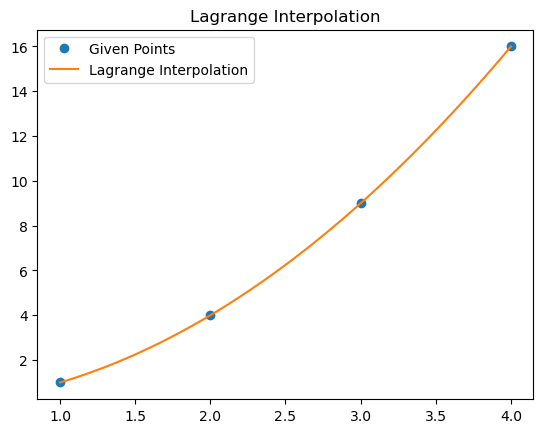

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x_values, y_values, x):
    total_sum = 0
    n = len(x_values)
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term = term * (x - x_values[j]) / (x_values[i] - x_values[j])
        total_sum += term
    return total_sum

x_values = np.array([1, 2, 3, 4])
y_values = np.array([1, 4, 9, 16])

x_interp = np.linspace(1, 4, 100)
y_interp = [lagrange_interpolation(x_values, y_values, xi) for xi in x_interp]

plt.plot(x_values, y_values, 'o', label='Given Points')
plt.plot(x_interp, y_interp, '-', label='Lagrange Interpolation')
plt.legend()
plt.title('Lagrange Interpolation')
plt.show()

# Polynomial Approximation (Least Squares)

Coefficients of the polynomial: [ 1.00000000e+00 -3.77446436e-15  7.14015350e-15]


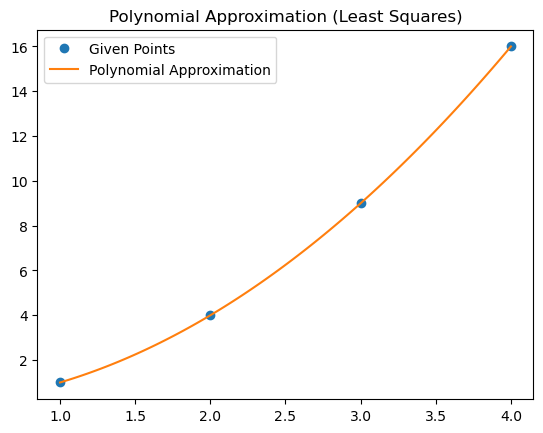

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.array([1, 2, 3, 4])
y_values = np.array([1, 4, 9, 16])

degree = 2

coefficients = np.polyfit(x_values, y_values, degree)
polynomial = np.poly1d(coefficients)

x_interp = np.linspace(1, 4, 100)
y_interp = polynomial(x_interp)

print("Coefficients of the polynomial:", coefficients)

plt.plot(x_values, y_values, 'o', label='Given Points')
plt.plot(x_interp, y_interp, '-', label='Polynomial Approximation')
plt.legend()
plt.title('Polynomial Approximation (Least Squares)')
plt.show()

# Trapezoidal Rule for numerical integration

In [3]:
import numpy as np

def trapezoidal_rule(func, a, b, n):
    """
    Approximates the integral of a function `func` from `a` to `b`
    using the trapezoidal rule with `n` subintervals.
    
    Parameters:
    func: callable
        The function to integrate.
    a: float
        The start of the interval.
    b: float
        The end of the interval.
    n: int
        The number of subintervals.
    
    Returns:
    float
        The approximate integral of `func` from `a` to `b`.
    """
    # Width of each subinterval
    h = (b - a) / n
    
    # Calculate the sum
    integral = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        integral += func(a + i * h)
    
    return integral * h

# Example usage:
f = lambda x: np.sin(x)  # Example function
a = 0                    # Lower bound of integration
b = np.pi                # Upper bound of integration
n = 1000                 # Number of subintervals

result = trapezoidal_rule(f, a, b, n)
print(f"Approximate integral: {result}")

Approximate integral: 1.9999983550656624
